# Удержание клиентов Телеком
<br>

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят).


<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

### Загрузка библитотек и данных

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import math
import missingno as msno
from datetime import datetime, timedelta

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import (train_test_split, StratifiedKFold, KFold,\
                                     GridSearchCV, cross_val_score)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

import xgboost as xgb

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD as SVD
from sklearn.manifold import TSNE

from sklearn.metrics import (accuracy_score, confusion_matrix,\
                             precision_score, recall_score,\
                             roc_auc_score, roc_curve, f1_score)

In [4]:
#Загружаем DataFrame
df = pd.read_csv('telecom_users.csv', sep=',', index_col=0)

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# 1. Описание данных

#### Посмотрим на главные характеристики датасета:

In [7]:
df.shape

(5986, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


Странно, что столбец "TotalCharges" имеет тип данных "object", когда там должны быть только цифры.

In [9]:
df.nunique()

customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

#Посмотрим, есть ли пропуски в данных
msno.matrix(df)

In [10]:
# Пробуем преобразовать тип данных столбца.
try: 
    df['TotalCharges']=df.TotalCharges.astype('float64')
except:
    print ('could not convert string to float')

could not convert string to float


Пропусков в датасете нет, но столбец с суммой оплаты клиента не может быть переведена в тип 'float64'. Посмотрим какие строковые значения имеет столбец

In [11]:
# Составим список всех строковых значений из колонки 'TotalCharges'
a=0
mis=[]
for i in df.TotalCharges:
    try:
        if float(i):
            a+=1
    except:
        if i not in mis:
            mis+=[i]
mis

[' ']

Так как данные суммы оплата клиента являются произведение месяцев на месячную плату, то заполним пропуски.

In [12]:
df.loc[df['TotalCharges'].isin(mis), 'TotalCharges']=\
df.loc[df['TotalCharges'].isin(mis), 'MonthlyCharges']*df.loc[df['TotalCharges'].isin(mis), 'tenure']

In [13]:
# Клиенты, которые подключились первый месяц.
df.loc[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No


In [14]:
df['TotalCharges']=df.TotalCharges.astype('float64')

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


#### Рассмотрим количество действующих и ушедших клиентов.

In [17]:
y_n={'Yes':1, 'No':0}
df['Churn'] = df['Churn'].map(y_n)

In [18]:
df.groupby('Churn', as_index=False)[['customerID']].count()

,Churn,customerID
0,0,4399
1,1,1587


In [19]:
# Процентное содержание ушедших клиентов
print('Ушедших клиентов: ', round(df['Churn'].mean()*100), '%')

Ушедших клиентов:  27 %


# 2. Исследование зависимостей и формулирование гипотез

### 1) Расмсотрим фичи в зависимости от оттока клиентов

**Распределение по полу, возрасту и наличию партнера.**

In [20]:
df.groupby(['gender', 'SeniorCitizen', 'Partner'], as_index=False)[['customerID', 'Churn']].\
agg({'customerID':'count', 'Churn':'mean'})

,gender,SeniorCitizen,Partner,customerID,Churn
0,Female,0,No,1233,0.309002
1,Female,0,Yes,1221,0.167076
2,Female,1,No,267,0.501873
3,Female,1,Yes,215,0.334884
4,Male,0,No,1368,0.289474
5,Male,0,Yes,1198,0.170284
6,Male,1,No,214,0.467290
7,Male,1,Yes,270,0.355556


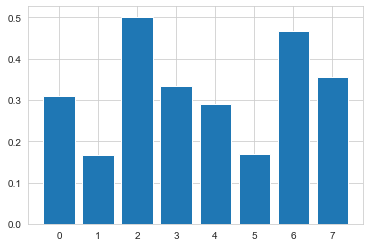

In [21]:
plt.bar(height=df.groupby(['gender', 'SeniorCitizen', 'Partner'], as_index=False)[['customerID', 'Churn']].\
agg({'customerID':'count', 'Churn':'mean'}).Churn, x=df.groupby(['gender', 'SeniorCitizen', 'Partner'], as_index=False)[['customerID', 'Churn']].\
agg({'customerID':'count', 'Churn':'mean'}).index)
plt.show()

Заметим, что распределение среди ушедших мужчин и женщин почти одинаковое, независимо от возраста и наличия партнера.

**Распределение по параметру, есть ли у клиента еждивенцы.**

In [22]:
df.groupby(['Dependents'], as_index=False)[['customerID', 'Churn']].\
agg({'customerID':'count', 'Churn':'mean'})

,Dependents,customerID,Churn
0,No,4195,0.311323
1,Yes,1791,0.156896


Люди без еждивенцов уходят в два раза чаще. Видимо им легче сделать такой выбор.

**Распределение по услуге PhoneService.**

In [23]:
df.groupby(['PhoneService'], as_index=False)[['customerID', 'Churn']].\
agg({'customerID':'count', 'Churn':'mean'})

,PhoneService,customerID,Churn
0,No,590,0.252542
1,Yes,5396,0.266494


Распределние одинковое.

**Распределение по услуге InternetService.**

In [24]:
df.groupby(['InternetService'], as_index=False)[['customerID', 'Churn']].\
agg({'customerID':'count', 'Churn':'mean'})

,InternetService,customerID,Churn
0,DSL,2068,0.191973
1,Fiber optic,2627,0.415303
2,No,1291,0.076685


In [25]:
print('Средня стоимость интернета Fiber optic: ', (df[df['InternetService']=='Fiber optic'].MonthlyCharges.mean()))
print('Средня стоимость интернета DSL: ', (df[df['InternetService']=='DSL'].MonthlyCharges.mean()))
print('Соотношение средней цены Fiber optic/DSL: ', (df[df['InternetService']=='Fiber optic'].MonthlyCharges.mean())/(df[df['InternetService']=='DSL'].MonthlyCharges.mean()))

Средня стоимость интернета Fiber optic:  91.55437761705349
Средня стоимость интернета DSL:  58.10587524177949
Соотношение средней цены Fiber optic/DSL:  1.575647509586496


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

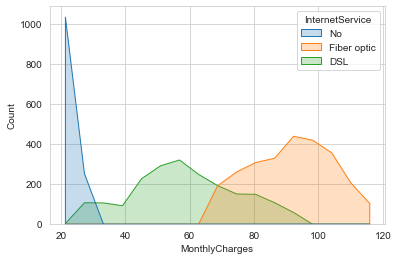

In [26]:
sns.histplot(data=df, x='MonthlyCharges', hue='InternetService', element="poly")

Более 40% людей с интернетом типа Fiber optic отключились от провайдера. <br>
Можно выделить две причины, на которые стоит обратить внимание: <br>
1) Качество интрента типа Fiber optic, возможно провести работы по улучшению стабильности работы. <br>
2) Стоимость услуг интернета типа Fiber optic в сравнении с другими провайдерами. <br>


**Распределение по типу контракта.**

In [27]:
df.groupby(['Contract'], as_index=False)[['customerID', 'Churn']].\
agg({'customerID':'count', 'Churn':'mean'})

,Contract,customerID,Churn
0,Month-to-month,3269,0.427654
1,One year,1276,0.115987
2,Two year,1441,0.028452


Более 40% ушедших людей заключали договор с помесячной оплатой. <br>
Из-за этого им проще сделать шаг в сторону другого провайдера в любое время.

**Распределение по методу оплаты.**

In [28]:
df.groupby(['PaymentMethod'], as_index=False)[['customerID', 'Churn']].\
agg({'customerID':'count', 'Churn':'mean'})

,PaymentMethod,customerID,Churn
0,Bank transfer (automatic),1308,0.171254
1,Credit card (automatic),1303,0.151957
2,Electronic check,2006,0.449651
3,Mailed check,1369,0.192111


Более 40% ушедших людей для оплаты пользовались электронным чеком. <br>
Компании стоит обратить внимание на проблемы с таким способом оплаты. Вероятно деньги поступают на счет компании с задержкой и у клиентов происходит отключение интернета, хоть они и оплатили.

**Распределение по сроку использования провайдера клиентами.**

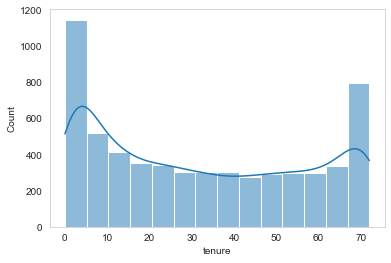

In [29]:
sns.histplot(df.tenure, kde=True)
plt.grid()

In [30]:
df['Categoricaltenure'] = pd.cut(df['tenure'], 4)
df[['Categoricaltenure', 'Churn']].groupby(['Categoricaltenure'], as_index=False).mean()

,Categoricaltenure,Churn
0,"(-0.072, 18.0]",0.441023
1,"(18.0, 36.0]",0.227961
2,"(36.0, 54.0]",0.188623
3,"(54.0, 72.0]",0.080386


Заметим, что основнной отток клиентов происходит в первые полтора года.

**Распределение по месяцной оплате.**

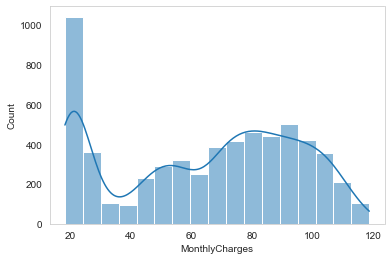

In [31]:
sns.histplot(df.MonthlyCharges, kde=True)
plt.grid()

In [32]:
df['CategoricalMonthlyCharges'] = pd.cut(df['MonthlyCharges'], 4)
df[['CategoricalMonthlyCharges', 'Churn']].groupby(['CategoricalMonthlyCharges'], as_index=False).mean()

,CategoricalMonthlyCharges,Churn
0,"(18.15, 43.375]",0.128094
1,"(43.375, 68.5]",0.216867
2,"(68.5, 93.625]",0.359423
3,"(93.625, 118.75]",0.339652


В основном отток лиентов происходит при стоимости в месяц более 68 долларов. 

In [33]:
df[['MonthlyCharges', 'TotalCharges']].describe()

,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000
mean,64.802213,2294.221559
std,30.114702,2274.164124
min,18.250000,0.000000
25%,35.650000,401.587500
50%,70.400000,1408.575000
75%,89.900000,3841.500000
max,118.750000,8684.800000


**Распределение по общей сумме заплаченой клиентом.**

,CategoricalTotalCharges,Churn
0,"(-8.685, 2171.2]",0.316338
1,"(2171.2, 4342.4]",0.228332
2,"(4342.4, 6513.6]",0.165083
3,"(6513.6, 8684.8]",0.115839


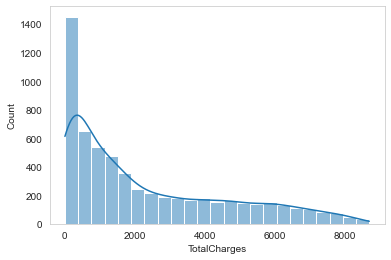

In [34]:
sns.histplot(df.TotalCharges, kde=True)
plt.grid()
df['CategoricalTotalCharges'] = pd.cut(df['TotalCharges'], 4)
df[['CategoricalTotalCharges', 'Churn']].groupby(['CategoricalTotalCharges'], as_index=False).mean()

C:\Users\Alexey\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


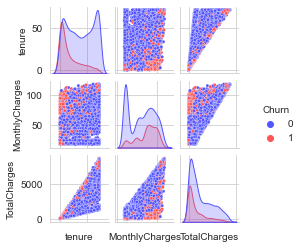

In [35]:
g = sns.pairplot(df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']], 
                 hue='Churn', palette = 'seismic', size=1.2, plot_kws=dict(s=10))
g.set(xticklabels=[])

### Преобразуем данные

In [36]:
#Сделаем резервную копию
df_main = df.copy()

Переведем данные категориальные и качественные в качественные в виде чисел (0, 1, ...)

In [37]:
# Сделаем map
y_n={'Yes':1, 'No':0}
y_n_havenot={'Yes':1, 'No':0, 'No internet service':0}
df_main['Partner'] = df_main['Partner'].map(y_n).astype(int)
df_main['Dependents'] = df_main['Dependents'].map(y_n).astype(int)
df_main['PhoneService'] = df_main['PhoneService'].map(y_n).astype(int)
df_main['PaperlessBilling'] = df_main['PaperlessBilling'].map(y_n).astype(int)

df_main['OnlineSecurity'] = df_main['OnlineSecurity'].map(y_n_havenot).astype(int)
df_main['OnlineBackup'] = df_main['OnlineBackup'].map(y_n_havenot).astype(int)
df_main['DeviceProtection'] = df_main['DeviceProtection'].map(y_n_havenot).astype(int)
df_main['TechSupport'] = df_main['TechSupport'].map(y_n_havenot).astype(int)
df_main['StreamingTV'] = df_main['StreamingTV'].map(y_n_havenot).astype(int)
df_main['StreamingMovies'] = df_main['StreamingMovies'].map(y_n_havenot).astype(int)

df_main['gender']=df_main['gender'].map({'Male':1, 'Female':2}).astype(int)
df_main['MultipleLines']=df_main['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service':0}).astype(int)
df_main['InternetService']=df_main['InternetService'].map({'Fiber optic':3, 'DSL':2, 'No':1}).astype(int)
df_main['Contract']=df_main['Contract'].map({'Month-to-month':1, 'One year':2, 'Two year':3}).astype(int)
df_main['PaymentMethod']=df_main['PaymentMethod'].\
                                        map({'Electronic check':1, 'Mailed check':2,\
                                             'Bank transfer (automatic)':3, 'Credit card (automatic)':4}).astype(int)


df_main.loc[df_main['tenure']<=18, 'tenure'] = 0
df_main.loc[(df_main['tenure']>18) & (df_main['tenure']<=36), 'tenure'] = 1
df_main.loc[(df_main['tenure']>36) & (df_main['tenure']<=54), 'tenure'] = 2
df_main.loc[(df_main['tenure']>54), 'tenure'] = 3

df_main.loc[df_main['MonthlyCharges']<=43.375, 'MonthlyCharges'] = 0
df_main.loc[(df_main['MonthlyCharges']>43.375) & (df_main['MonthlyCharges']<=68.5), 'MonthlyCharges'] = 1
df_main.loc[(df_main['MonthlyCharges']>68.5) & (df_main['MonthlyCharges']<=93.625), 'MonthlyCharges'] = 2
df_main.loc[(df_main['MonthlyCharges']>93.625), 'MonthlyCharges'] = 3

df_main.loc[df_main['TotalCharges']<=2171.2, 'TotalCharges'] = 0
df_main.loc[(df_main['TotalCharges']>2171.2) & (df_main['TotalCharges']<=4342.4), 'TotalCharges'] = 1
df_main.loc[(df_main['TotalCharges']>4342.4) & (df_main['TotalCharges']<=6513.6), 'TotalCharges'] = 2
df_main.loc[(df_main['TotalCharges']>6513.6), 'TotalCharges'] = 3

df_main['tenure']=df_main.tenure.astype('int')
df_main['MonthlyCharges']=df_main.MonthlyCharges.astype('int')
df_main['TotalCharges']=df_main.TotalCharges.astype('int')

In [38]:
# Еще раз сделаем копию данных для быстрого сброса будующих изменений
df_data=df_main.copy()

In [39]:
#Удаляем столбцы, которые не понадобятся для классификации.
df_data.drop(['customerID', 'Categoricaltenure', 'CategoricalMonthlyCharges', 'CategoricalTotalCharges'], axis=1, inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

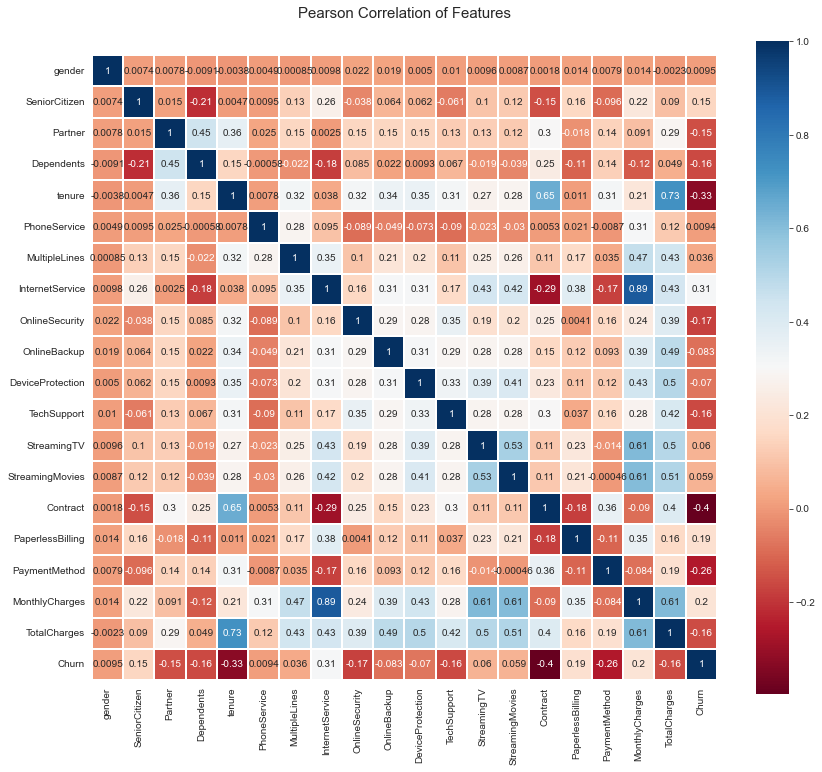

In [40]:
# Посмотрим на тепловую карту зависимостей между фичами
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

C:\Users\Alexey\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


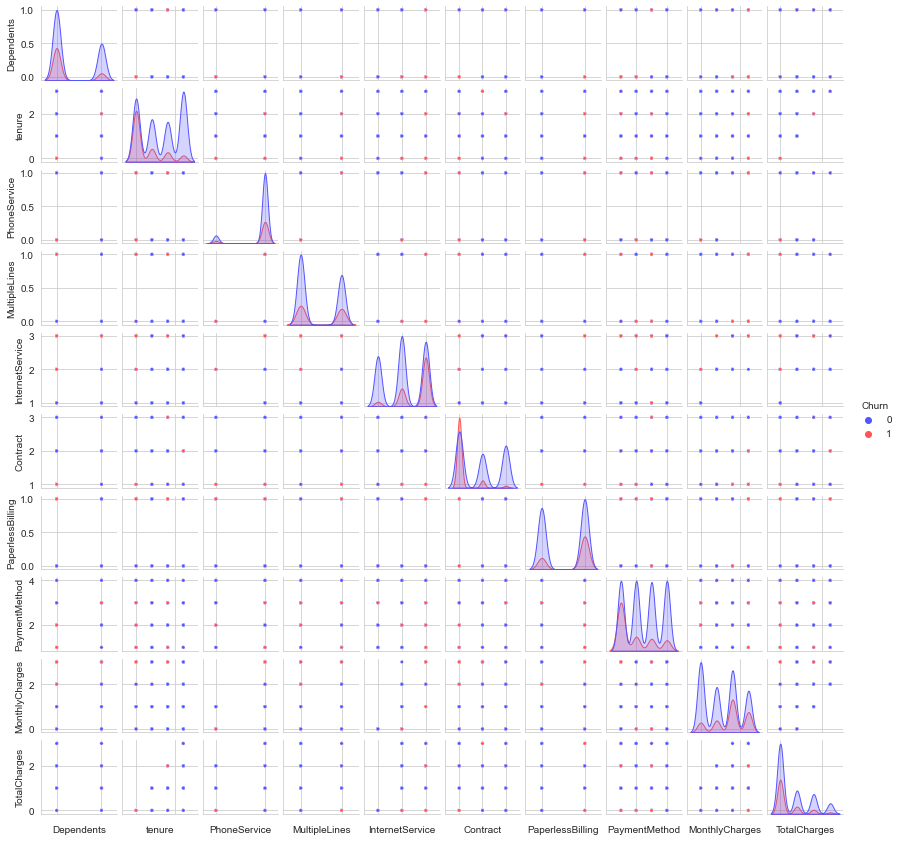

In [41]:
g = sns.pairplot(df_data[['Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']], 
                 hue='Churn', palette = 'seismic', size=1.2, plot_kws=dict(s=10))
g.set(xticklabels=[])

In [42]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,3,1,1,1,0,0,0,0,0,0,3,0,4,0,0,0
1,2,0,0,0,2,1,0,3,0,1,1,0,1,0,1,1,4,2,1,0
2,2,1,1,0,2,1,1,3,0,0,0,0,0,0,1,1,3,2,1,1
3,1,0,0,0,0,1,0,2,0,0,0,0,0,1,1,1,1,1,0,0
4,1,0,0,0,0,1,0,2,1,0,1,0,0,0,1,0,1,1,0,0


Определим важность фичей с помощью функции SelectKBest

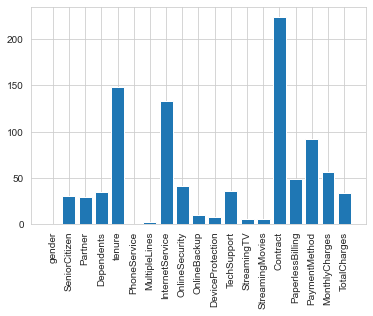

In [43]:
selector = SelectKBest(f_classif, k=5)
selector.fit(df_data.drop('Churn', axis=1), df_data["Churn"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(df_data.drop('Churn', axis=1).columns)), scores)
plt.xticks(range(len(df_data.drop('Churn', axis=1).columns)), df_data.drop('Churn', axis=1).columns, rotation='vertical')
plt.show()

Как мы ранее определили, самыми важными фичами являеются:
1) Как долго клиент пользуется услугами данного провайдера <br>
2) Подключен ли интернет сервис <br>
3) Тип заключенного контракта (годовой, помесячный) <br>
4) Метод платежа <br>
 <br>
**Так как в задаче требуется разделить клинтов по классам, то задача является задачей классификации.**

# 3. Построение моделей для прогнозирования оттока

Определим отдельными переменными фичи и целевую переменную, на основе которой будем обучать и тестировать модели.

In [44]:
x = df_data.drop('Churn', axis=1)
y = df_data.Churn.copy()

Разделим на тренировочные и тестовые данные. <br>
Применим параметр stratify, чтобы разбиение на тренировочные и тестовое данные содержало пропорциональное количество подключенных и ушедших пользователей.

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [46]:
# создадим условие для разбиения данных при обучении
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=35)

Создадим функцию, которая будет создавать модели. <br>
Для прогнозирования оттока будем сравнивать 9 основных моделей. <br>
KNeighborsClassifier <br>
GaussianNB <br>
DecisionTreeClassifier <br>
LogisticRegression <br>
SGDClassifier <br>
SVC <br>
AdaBoostClassifier <br>
RandomForestClassifier <br>
GradientBoostingClassifier <br>

In [47]:
def model_algoritm ():
    knn = KNeighborsClassifier(n_neighbors=2)

    gnb = GaussianNB()

    dtc = DecisionTreeClassifier(max_depth=4, random_state=35)

    lr = LogisticRegression(random_state=35)

    sgd = SGDClassifier()

    svc = SVC()

    ada = AdaBoostClassifier(random_state=35)

    rfc = RandomForestClassifier(random_state=35)

    gbc = GradientBoostingClassifier(random_state=35)

    return knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc

alg = ['KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'LogisticRegression',\
       'SGDClassifier', 'SVC', 'AdaBoostClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']

Обучим модели на тренировочных данных и посмотрим на основные метрики на тестовых данных.

In [48]:
knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc=model_algoritm()
model = [knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc]

metrics_data = pd.DataFrame()

for mod, al in zip(model, alg):   
    mod.fit(x_train, y_train)
    y_predict = mod.predict(x_test)
    
    accuracy_test = accuracy_score(y_test, y_predict)
    mod_matrix=confusion_matrix(y_test, y_predict)
    precision_mod = precision_score(y_test, y_predict)
    recall_mod = recall_score(y_test, y_predict)
    f1_mera = f1_score(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict)
    print ('{} \n Accuracy {} \n {} \n'.format(al, accuracy_test, mod_matrix))
    
    metrict_dict = {'Alg_model':al, 'Accuracy':accuracy_test,\
                    'auc':auc, 'precision':precision_mod,\
                    'recall':recall_mod, 'f1':f1_mera}
    metrics_data=metrics_data.append( metrict_dict, ignore_index=True)

KNeighborsClassifier 
 Accuracy 0.762249443207127 
 [[1227   93]
 [ 334  142]] 

GaussianNB 
 Accuracy 0.7544543429844098 
 [[1025  295]
 [ 146  330]] 

DecisionTreeClassifier 
 Accuracy 0.7895322939866369 
 [[1236   84]
 [ 294  182]] 

LogisticRegression 
 Accuracy 0.7928730512249443 
 [[1185  135]
 [ 237  239]] 

SGDClassifier 
 Accuracy 0.7700445434298441 
 [[1079  241]
 [ 172  304]] 

SVC 
 Accuracy 0.7989977728285078 
 [[1214  106]
 [ 255  221]] 

AdaBoostClassifier 
 Accuracy 0.7939866369710468 
 [[1188  132]
 [ 238  238]] 

RandomForestClassifier 
 Accuracy 0.7733853006681515 
 [[1169  151]
 [ 256  220]] 

GradientBoostingClassifier 
 Accuracy 0.7906458797327395 
 [[1183  137]
 [ 239  237]] 



In [49]:
metrics_data

,Alg_model,Accuracy,auc,precision,recall,f1
0,KNeighborsClassifier,0.762249,0.613932,0.604255,0.298319,0.399437
1,GaussianNB,0.754454,0.734896,0.528000,0.693277,0.599455
2,DecisionTreeClassifier,0.789532,0.659358,0.684211,0.382353,0.490566
3,LogisticRegression,0.792873,0.699914,0.639037,0.502101,0.562353
4,SGDClassifier,0.770045,0.728040,0.557798,0.638655,0.595495
5,SVC,0.798998,0.691991,0.675841,0.464286,0.550436
6,AdaBoostClassifier,0.793987,0.700000,0.643243,0.500000,0.562648
7,RandomForestClassifier,0.773385,0.673895,0.592992,0.462185,0.519481
8,GradientBoostingClassifier,0.790646,0.697056,0.633690,0.497899,0.557647


Все модели дают примерно одинаковый результат. <br>
Модель GaussianNB показала лучший результат по метреке recall.
 <br>
 **Для удержания клиента компания может применять различные поощрения клиента в виде бонусов, скидок, промокодов, доплнительных сервисов и прочее. В данной задаче для нас главной метрикой определения качества модели является "roc_auc".** <br>
 **Если поощрим клинента, который не собирался уходить, то для компании это не так много, а клиент станет еще преданнее.**

Определим параметры моделий, которые хотим варировать для улучшения качества моделей и сделаем обучение при помощи GridSearchCV. Главной метрикой установим "auc".

In [50]:
# Определяем параметры для алгоритмов

knn_param = {'n_neighbors':range(1, 10)}

gnb_param = {}

dtc_param = {'criterion': ['gini', 'entropy'],\
             'max_depth': range(1,11, 5),\
             'max_features': range(4, 10, 3)}

lr_param = {'C': np.logspace(-4, 4, 5), 'penalty': ['l1', 'l2'], 'solver':['liblinear']}

sgd_param = {'penalty':['elasticnet'], "loss": ["log"], "penalty": ["l2"], 'alpha':np.arange(0.00005, 0.001, 0.0001)}

svc_param = {'kernel' : ['linear'], 'C' : [0.001, 0.001, 1, 2, 2.5, 3, 10]}

ada_param = {'n_estimators': range(1, 15, 1), 'learning_rate' : np.arange(0.1, 1, 0.1)}

rfc_param = {'n_estimators': range(10, 100, 10)}

gbc_param = {'n_estimators': range(10, 100, 10)}

In [52]:
%%time

knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc=model_algoritm()

model = [knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc]
params = [knn_param, gnb_param, dtc_param, lr_param, sgd_param, svc_param, ada_param, rfc_param, gbc_param]

metrics_data_grid = pd.DataFrame()

for mod, al, params in zip(model, alg, params):
    clf = GridSearchCV(mod, params, scoring='roc_auc', cv=skf, n_jobs=-1, refit=True, verbose=1)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    accuracy_test = accuracy_score(y_test, y_predict)

    try: print(clf.get_params, clf.best_params_)
    except: pass
    clf_matrix=confusion_matrix(y_test, y_predict)
    precision_clf = precision_score(y_test, y_predict)
    recall_clf = recall_score(y_test, y_predict)
    f1_mera = f1_score(y_test, y_predict)
    auc_p=roc_auc_score(y_test, y_predict)
    print ('{} \n Accuracy: {} \n {} \n'.format(al, accuracy_test, clf_matrix))
    metrict_dict = {'Alg_model':al, 'Accuracy':accuracy_test,\
                    'auc':auc_p, 'precision':precision_clf,\
                    'recall':recall_clf, 'f1':f1_mera}
    metrics_data_grid =metrics_data_grid.append( metrict_dict, ignore_index=True)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
<bound method BaseEstimator.get_params of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=35, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10)}, scoring='roc_auc',
             verbose=1)> {'n_neighbors': 9}
KNeighborsClassifier 
 Accuracy: 0.7706013363028953 
 [[1127  193]
 [ 219  257]] 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
<bound method BaseEstimator.get_params of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=35, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='roc_auc', verbose=1)> {}
GaussianNB 
 Accuracy: 0.7544543429844098 
 [[1025  295]
 [ 146  330]] 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
<bound method BaseEstimator.get_params of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=35, shuffle=True),
            

In [53]:
metrics_data

,Alg_model,Accuracy,auc,precision,recall,f1
0,KNeighborsClassifier,0.762249,0.613932,0.604255,0.298319,0.399437
1,GaussianNB,0.754454,0.734896,0.528000,0.693277,0.599455
2,DecisionTreeClassifier,0.789532,0.659358,0.684211,0.382353,0.490566
3,LogisticRegression,0.792873,0.699914,0.639037,0.502101,0.562353
4,SGDClassifier,0.770045,0.728040,0.557798,0.638655,0.595495
5,SVC,0.798998,0.691991,0.675841,0.464286,0.550436
6,AdaBoostClassifier,0.793987,0.700000,0.643243,0.500000,0.562648
7,RandomForestClassifier,0.773385,0.673895,0.592992,0.462185,0.519481
8,GradientBoostingClassifier,0.790646,0.697056,0.633690,0.497899,0.557647


In [54]:
metrics_data_grid

,Alg_model,Accuracy,auc,precision,recall,f1
0,KNeighborsClassifier,0.770601,0.696852,0.571111,0.539916,0.555076
1,GaussianNB,0.754454,0.734896,0.528000,0.693277,0.599455
2,DecisionTreeClassifier,0.785078,0.693268,0.617188,0.497899,0.551163
3,LogisticRegression,0.792873,0.700586,0.638298,0.504202,0.563380
4,SGDClassifier,0.768931,0.738700,0.552496,0.674370,0.607379
5,SVC,0.796214,0.709575,0.641026,0.525210,0.577367
6,AdaBoostClassifier,0.795657,0.704495,0.644562,0.510504,0.569754
7,RandomForestClassifier,0.772272,0.671795,0.590786,0.457983,0.515976
8,GradientBoostingClassifier,0.795100,0.697399,0.650838,0.489496,0.558753


Качество моделей улучилось. <br>
SGDClassifier имеет лучшие показатели

**Проверим пргноз на методе xgboost.**

In [55]:
#xgboost
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)
xgb_params = {'objective': 'binary:logistic', 
          'max_depth': 1, 
          'silent': 1, 
          'eta': 1,
          'eval_metric':'auc',
          'verbosity':0}
num_rounds = 30

In [56]:
xgb_model = xgb.train(xgb_params, dtrain, num_rounds)
y_pred = xgb_model.predict(dtest)
y_pred_bin = [True if i>0.5 else False for i in y_pred ]
y_pred_bin = np.array(y_pred_bin)

In [57]:
con_matrix = confusion_matrix(y_test, y_pred_bin)
prec_score = precision_score(y_test, y_pred_bin)
re_score = recall_score(y_test, y_pred_bin)
auc = roc_auc_score(y_test, y_pred_bin)
print('Матрица \n {} \n Precision = {} \n Recall = {} \n roc_auc = {}'.format(con_matrix, prec_score, re_score, auc))

Матрица 
 [[1186  134]
 [ 231  245]] 
 Precision = 0.6464379947229552 
 Recall = 0.5147058823529411 
 roc_auc = 0.7065953654188948


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

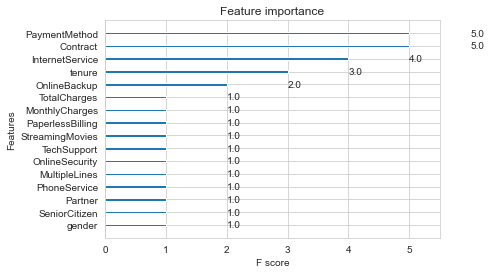

In [58]:
xgb.plot_importance(xgb_model)

In [59]:
a=[]
for i in range(1,16):
    scale_pos_weight_ = (sum(y_train==0)/sum(y_train==1))/i
    params = {'objective': 'binary:logistic', 
              'max_depth': 1, 
              'silent': 1, 
              'eta': 1,
             'scale_pos_weight':scale_pos_weight_,
             'verbosity':0}
    xgb_model = xgb.train(params, dtrain, num_rounds)
    y_pred = xgb_model.predict(dtest)
    y_pred_bin = [True if i>0.5 else False for i in y_pred ]
    y_pred_bin = np.array(y_pred_bin)
    y_pred_bin

    con_matrix = confusion_matrix(y_test, y_pred_bin)
    prec_score = precision_score(y_test, y_pred_bin)
    re_score = recall_score(y_test, y_pred_bin)
    #print('Матрица \n {} \n Precision = {} \n Recall = {}'.format(con_matrix, prec_score, re_score))
    a+=[[i, prec_score, re_score]]
a = np.array(a)

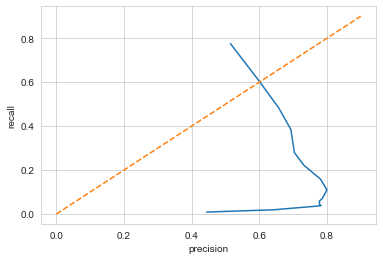

In [60]:
plt.plot(a[:, 1], a[:, 2])
plt.plot([0, .9], [0, .9], ls='--')
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()

Оптимальное качество получаем, когда recall и precision достигаю 0.6

In [61]:
clf = xgb.XGBClassifier()
xgbclass_param = {'objective' : ['binary:logistic'], 
                  'max_depth': [3,4,5],
                  "learning_rate": [0.01, 0.02, 0.05],
                  'scale_pos_weight':[1,3,5],
                  'silent': [1], 
                  'eta': [1],
                  'eval_metric':['aucpr'],
                  'verbosity':[0]}


In [62]:
xgb_grid = GridSearchCV(clf, xgbclass_param, cv=skf, n_jobs=-1)
xgb_grid.fit(x_train, y_train, early_stopping_rounds=10, eval_set=[(x_test, y_test)])
y_predict = xgb_grid.predict(x_test)
accuracy_test = accuracy_score(y_test, y_predict)
print(xgb_grid.get_params, xgb_grid.best_params_)

clf_matrix=confusion_matrix(y_test, y_predict)
precision_clf = precision_score(y_test, y_predict)
recall_clf = recall_score(y_test, y_predict)
f1_mera_clf = f1_score(y_test, y_predict)
print('Best_score: ', xgb_grid.best_score_)
print ('{} \n {} \n Accuracy: {} \n precision: {} \n recall: {} \n f1: {} \n'.\
       format(al, clf_matrix, accuracy_test, precision_clf, recall_clf, f1_mera_clf))

[0]	validation_0-aucpr:0.58540
[1]	validation_0-aucpr:0.58687
[2]	validation_0-aucpr:0.59111
[3]	validation_0-aucpr:0.59260
[4]	validation_0-aucpr:0.59794
[5]	validation_0-aucpr:0.60063
[6]	validation_0-aucpr:0.59873
[7]	validation_0-aucpr:0.60247
[8]	validation_0-aucpr:0.60287
[9]	validation_0-aucpr:0.60335
[10]	validation_0-aucpr:0.60360
[11]	validation_0-aucpr:0.60687
[12]	validation_0-aucpr:0.60385
[13]	validation_0-aucpr:0.60711
[14]	validation_0-aucpr:0.60785
[15]	validation_0-aucpr:0.60631
[16]	validation_0-aucpr:0.60770
[17]	validation_0-aucpr:0.60765
[18]	validation_0-aucpr:0.60737
[19]	validation_0-aucpr:0.60765
[20]	validation_0-aucpr:0.60796
[21]	validation_0-aucpr:0.60817
[22]	validation_0-aucpr:0.60829
[23]	validation_0-aucpr:0.60801
[24]	validation_0-aucpr:0.60822
[25]	validation_0-aucpr:0.60915
[26]	validation_0-aucpr:0.60917
[27]	validation_0-aucpr:0.60960
[28]	validation_0-aucpr:0.60930
[29]	validation_0-aucpr:0.61036
[30]	validation_0-aucpr:0.60959
[31]	validation_0-

C:\Users\Alexey\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


При обучении получили следующие метрики: <br>
Accuracy: 0.79  <br>
precision: 0.63  <br>
recall: 0.5  <br>
f1: 0.558  <br>
auc: 0.61773

### Пробуем Stacking

In [63]:
knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc=model_algoritm()

model = [knn, gnb, dtc, lr, sgd, svc, ada, rfc]
metrics_stack = pd.DataFrame()


In [64]:
train, valid, train_true, valid_true = train_test_split(x_train, y_train, train_size=0.5, random_state=35)

In [65]:
meta_mtrx=np.empty((train.shape[0], len(model)))

for n, mod in enumerate(model):
    mod.fit(train, train_true)
    meta_mtrx[:, n]=mod.predict(valid)
    y_pred=mod.predict(x_test)
    print('{},  roc_auc model: {}'.format (n, roc_auc_score(y_test, y_pred)))
    
meta_mod = GradientBoostingClassifier(n_estimators=60, random_state=17)
meta_mod.fit(meta_mtrx, valid_true)

0,  roc_auc model: 0.5964381207028265
1,  roc_auc model: 0.7368761140819965
2,  roc_auc model: 0.6698975044563279
3,  roc_auc model: 0.6908899923605807
4,  roc_auc model: 0.6822224344283169
5,  roc_auc model: 0.6673319327731092
6,  roc_auc model: 0.690769034886682
7,  roc_auc model: 0.6507862235803413


GradientBoostingClassifier(n_estimators=60, random_state=17)

In [66]:
meta_mtrx_test=np.empty((x_test.shape[0], len(model)))

for n, mod in enumerate(model):
    meta_mtrx_test[:, n] = mod.predict(x_test)
meta_predict = meta_mod.predict(meta_mtrx_test)
auc_stacking = roc_auc_score(y_test, meta_predict)
precision_mod_stac = precision_score(y_test, meta_predict)
recall_mod_stac = recall_score(y_test, meta_predict)
f1_mera_stac = f1_score(y_test, meta_predict)
print('Meta model roc_auc: {} \nprecision: {} \nrecall: {} \nf1: {}'.\
      format(auc_stacking, precision_mod_stac, recall_mod_stac, f1_mera_stac))

Meta model roc_auc: 0.6878947033358798 
precision: 0.6222826086956522 
recall: 0.4810924369747899 
f1: 0.5426540284360191


Пробуем понижение размерности.

In [67]:
pca = PCA(n_components=7).fit(x)
x_pca = pca.transform(x)

svd = SVD(n_components=3).fit(x)
x_svd = svd.transform(x)


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42, stratify=y)
knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc=model_algoritm()
model = [knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc]

metrics_data_pca = pd.DataFrame()

for mod, al in zip(model, alg):   
    mod.fit(x_train, y_train)
    y_predict = mod.predict(x_test)
    
    accuracy_test = accuracy_score(y_test, y_predict)

    precision_mod = precision_score(y_test, y_predict)
    recall_mod = recall_score(y_test, y_predict)
    f1_mera = f1_score(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict)
    
    metrict_dict = {'Alg_model':al, 'Accuracy':accuracy_test,\
                    'auc':auc, 'precision':precision_mod,\
                    'recall':recall_mod, 'f1':f1_mera}
    metrics_data_pca=metrics_data_pca.append( metrict_dict, ignore_index=True)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_svd, y, test_size=0.3, random_state=42, stratify=y)
knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc=model_algoritm()
model = [knn, gnb, dtc, lr, sgd, svc, ada, rfc, gbc]

metrics_data_svd = pd.DataFrame()

for mod, al in zip(model, alg):   
    mod.fit(x_train, y_train)
    y_predict = mod.predict(x_test)
    
    accuracy_test = accuracy_score(y_test, y_predict)

    precision_mod = precision_score(y_test, y_predict)
    recall_mod = recall_score(y_test, y_predict)
    f1_mera = f1_score(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict)
    
    metrict_dict = {'Alg_model':al, 'Accuracy':accuracy_test,\
                    'auc':auc, 'precision':precision_mod,\
                    'recall':recall_mod, 'f1':f1_mera}
    metrics_data_svd=metrics_data_svd.append( metrict_dict, ignore_index=True)

In [70]:
metrics_data_svd

,Alg_model,Accuracy,auc,precision,recall,f1
0,KNeighborsClassifier,0.744989,0.596145,0.536290,0.279412,0.367403
1,GaussianNB,0.768374,0.698023,0.564935,0.548319,0.556503
2,DecisionTreeClassifier,0.764477,0.686641,0.559819,0.521008,0.539717
3,LogisticRegression,0.787862,0.681729,0.640118,0.455882,0.532515
4,SGDClassifier,0.785635,0.666110,0.651163,0.411765,0.504505
5,SVC,0.787305,0.657843,0.674074,0.382353,0.487936
6,AdaBoostClassifier,0.787305,0.705529,0.614078,0.531513,0.569820
7,RandomForestClassifier,0.771715,0.674102,0.587302,0.466387,0.519906
8,GradientBoostingClassifier,0.785635,0.690288,0.621984,0.487395,0.546525


In [71]:
metrics_data_pca

,Alg_model,Accuracy,auc,precision,recall,f1
0,KNeighborsClassifier,0.743318,0.588964,0.532189,0.260504,0.349788
1,GaussianNB,0.772272,0.697988,0.574944,0.539916,0.556880
2,DecisionTreeClassifier,0.782851,0.641380,0.680672,0.340336,0.453782
3,LogisticRegression,0.787305,0.694111,0.624339,0.495798,0.552693
4,SGDClassifier,0.780067,0.678441,0.612813,0.462185,0.526946
5,SVC,0.798998,0.687962,0.682540,0.451681,0.543616
6,AdaBoostClassifier,0.779510,0.690823,0.600503,0.502101,0.546911
7,RandomForestClassifier,0.770045,0.668936,0.585366,0.453782,0.511243
8,GradientBoostingClassifier,0.786192,0.692010,0.622340,0.491597,0.549296


In [72]:
metrics_data

,Alg_model,Accuracy,auc,precision,recall,f1
0,KNeighborsClassifier,0.762249,0.613932,0.604255,0.298319,0.399437
1,GaussianNB,0.754454,0.734896,0.528000,0.693277,0.599455
2,DecisionTreeClassifier,0.789532,0.659358,0.684211,0.382353,0.490566
3,LogisticRegression,0.792873,0.699914,0.639037,0.502101,0.562353
4,SGDClassifier,0.770045,0.728040,0.557798,0.638655,0.595495
5,SVC,0.798998,0.691991,0.675841,0.464286,0.550436
6,AdaBoostClassifier,0.793987,0.700000,0.643243,0.500000,0.562648
7,RandomForestClassifier,0.773385,0.673895,0.592992,0.462185,0.519481
8,GradientBoostingClassifier,0.790646,0.697056,0.633690,0.497899,0.557647


Понижение размерности улучшения метрик моделий не дало.

# 4. Сравнение качества моделей 

In [73]:
print('Meta model roc_auc: {} \nprecision: {} \nrecall: {} \nf1: {}'.\
      format(auc_stacking, precision_mod_stac, recall_mod_stac, f1_mera_stac))
metrics_data_grid

Meta model roc_auc: 0.6878947033358798 
precision: 0.6222826086956522 
recall: 0.4810924369747899 
f1: 0.5426540284360191


,Alg_model,Accuracy,auc,precision,recall,f1
0,KNeighborsClassifier,0.770601,0.696852,0.571111,0.539916,0.555076
1,GaussianNB,0.754454,0.734896,0.528000,0.693277,0.599455
2,DecisionTreeClassifier,0.785078,0.693268,0.617188,0.497899,0.551163
3,LogisticRegression,0.792873,0.700586,0.638298,0.504202,0.563380
4,SGDClassifier,0.768931,0.738700,0.552496,0.674370,0.607379
5,SVC,0.796214,0.709575,0.641026,0.525210,0.577367
6,AdaBoostClassifier,0.795657,0.704495,0.644562,0.510504,0.569754
7,RandomForestClassifier,0.772272,0.671795,0.590786,0.457983,0.515976
8,GradientBoostingClassifier,0.795100,0.697399,0.650838,0.489496,0.558753


XGBoost: <br>
Accuracy: 0.79  <br>
precision: 0.63  <br>
recall: 0.5  <br>
f1: 0.558  <br>
auc: 0.61773

Лучший результат предсказания дала модель XGBoost.